# Data collection

In [1]:
# By Alexander Davies
# Last updated 26/12/2021

import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
import random as rand

# Load data from file into dataframe
df = pd.read_csv("bin\\NetflixViewingHistory.csv")

# Convert dates to datetime type
df["Date"] = pd.to_datetime(df["Date"])

# Extract data from "Date" column into new columns
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month_name()
df["Day"] = df["Date"].dt.day
df["Day_of_week"] = df["Date"].dt.day_name()

# Split the title data
title_details = df.Title.str.split(":", expand=True, n=2)
# Use title data for new column names
df["Show_name"] = title_details[0]
df["Season"] = title_details[1]
df["Episode_name"] = title_details[2]
# Determine whether a record is a show or a movie
df["Show_type"] = df.apply(lambda x: "Movie" if pd.isnull(x["Season"]) else "TV Show", axis=1)

In [2]:
#df.to_csv("Modified_History.csv")

# Plotting

In [3]:
# Show values for barplot on top of bar
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

In [4]:
palettes = ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r',
           'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r',
           'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r',
           'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r',
           'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r',
           'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r',
           'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix',
           'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r',
           'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2',
           'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r',
           'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism',
           'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r',
           'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted',
           'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r']

In [5]:
df.columns

Index(['Title', 'Date', 'Year', 'Month', 'Day', 'Day_of_week', 'Show_name',
       'Season', 'Episode_name', 'Show_type'],
      dtype='object')

In [6]:
def day_frequency_by_year(yearChosen = 2021, monthChosen = "January", paletteChosen = "Spectral"):
    
    # Build specific dataframes
    df_year = df.loc[df["Year"] == yearChosen]
    
    plt.figure(figsize=(15,5))

    plot = sb.barplot(x = df_year["Day"].value_counts().index,
                      y = df_year["Day"].value_counts(),
                      palette = paletteChosen)
    
    # Label each bar with its value
    show_values(plot)
    # Define labels
    title = "Most active day of the week in %s" % (yearChosen)
    plt.title(title)
    plt.xlabel("Day of week")
    plt.ylabel("Frequency")

In [7]:
def day_frequency_by_month(yearChosen = 2021, monthChosen = "January", paletteChosen = "Spectral"):
    
    # Build specific dataframes
    df_year = df.loc[df["Year"] == yearChosen]
    df_month = df_year.loc[df_year["Month"] == monthChosen]

    plt.figure(figsize=(15,5))
    # Plot data
    plot = sb.barplot(x = df_month["Day"].value_counts().index,
                    y = df_month["Day"].value_counts(),
                    palette = paletteChosen) 
    
    # Label each bar with its value
    show_values(plot)
    # Define labels
    title = "Most active day of the week in the month of %s" % (monthChosen)
    plt.title(title)
    plt.xlabel("Day of week")
    plt.ylabel("Frequency")

In [8]:
def day_of_week_frequency(yearChosen = 2021, paletteChosen = "Spectral"):
    
    # Define dimensions of figure
    plt.figure(figsize=(15, 9))
    
    # Create new dataframe containing data from one year only
    new_df = df.loc[df["Year"] == yearChosen]
    # Plot data
    plot = sb.barplot(x = new_df["Day_of_week"].value_counts().index,
                      y = new_df["Day_of_week"].value_counts(),
                      palette = paletteChosen)
    
    # Label each bar with its value
    show_values(plot)
    # Define labels
    title = "Most active day of the week in %s" % (yearChosen)
    plt.title(title)
    plt.xlabel("Day of week")
    plt.ylabel("Frequency")

In [9]:
def month_frequency(yearChosen = 2021, paletteChosen = "Spectral"):
    
    # Define dimensions of figure
    plt.figure(figsize=(15,5))

    # Create new dataframe containing data from one year only
    new_df = df.loc[df["Year"] == yearChosen]
    # Plot data
    plot = sb.barplot(x = new_df["Month"].value_counts().index, 
                    y = new_df["Month"].value_counts(), 
                    palette = paletteChosen)
    # Label each bar with its value
    show_values(plot)
    # Define labels
    plt.title("Most active Month")
    plt.xlabel("Month of the Year")
    plt.ylabel("Frequency")

In [10]:
def year_frequency(paletteChosen = "Spectral"):
    
    # Define dimensions for figure
    plt.figure(figsize=(15, 5))

    # Plot
    plot = sb.barplot(x = df["Year"].value_counts().index,
                    y = df["Year"].value_counts(),
                    palette = paletteChosen)
    # Label each bar with its value
    show_values(plot)
    # Define labels
    plt.title("Most active Year")
    plt.xlabel("Year")
    plt.ylabel("Frequency")

In [11]:
def most_watched(yearChosen = 2021, nToShow = 20, paletteChosen = "Spectral"):
    
    # Define dimensions for figure
    plt.figure(figsize=(15, 5))

    # Create new dataframe containing shows from specific year
    new_df = df.loc[(df["Year"] == yearChosen) & (df["Show_type"] == "TV Show")]

    # Plot top 20
    plot = sb.barplot(x = new_df["Show_name"].value_counts().index[:nToShow],
                    y = new_df["Show_name"].value_counts()[:nToShow],
                    palette = paletteChosen)
    # Label each bar with its value
    show_values(plot)
    # Define labels
    title = "Favorite Shows In %s" % (yearChosen)
    plt.title(title)
    plt.xlabel("Year")
    plt.ylabel("Frequency")
    plot.tick_params(axis='x', rotation=90)

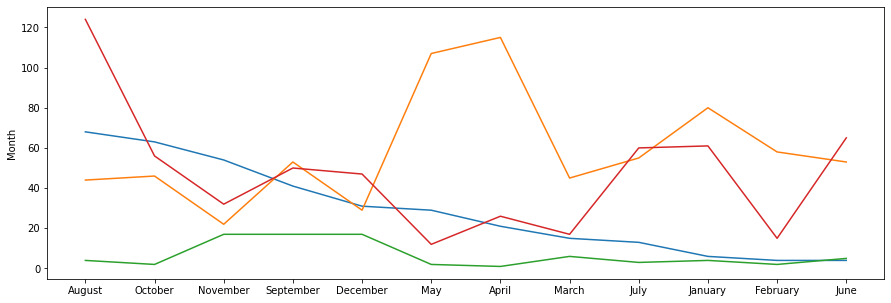

In [31]:
# Most active month in a year
# Displays four years
plt.figure(figsize=(15, 5))

year1 = df.loc[(df["Year"] == 2017)]
year2 = df.loc[(df["Year"] == 2018)]
year3 = df.loc[(df["Year"] == 2019)]
year4 = df.loc[(df["Year"] == 2020)]


plot = sb.lineplot(x = year1["Month"].value_counts().index,
                   y = year1["Month"].value_counts()) 
plot = sb.lineplot(x = year2["Month"].value_counts().index,
                   y = year2["Month"].value_counts())
plot = sb.lineplot(x = year3["Month"].value_counts().index,
                   y = year3["Month"].value_counts())
plot = sb.lineplot(x = year4["Month"].value_counts().index,
                   y = year4["Month"].value_counts())

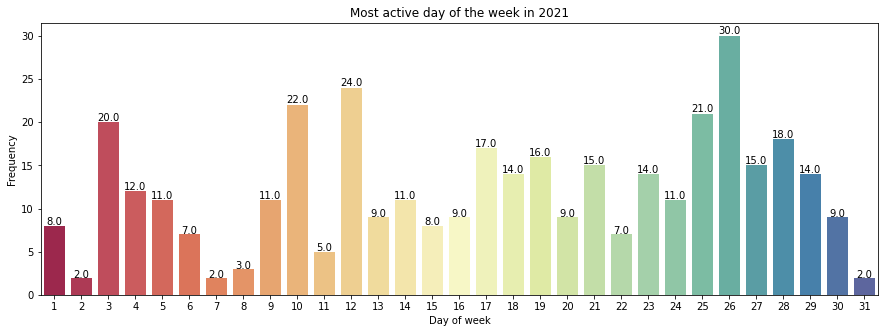

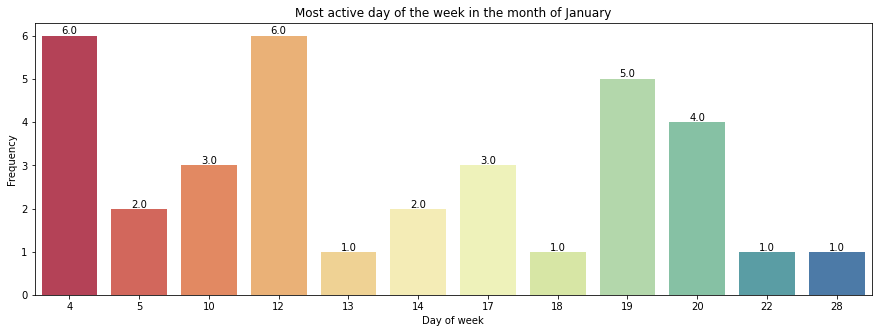

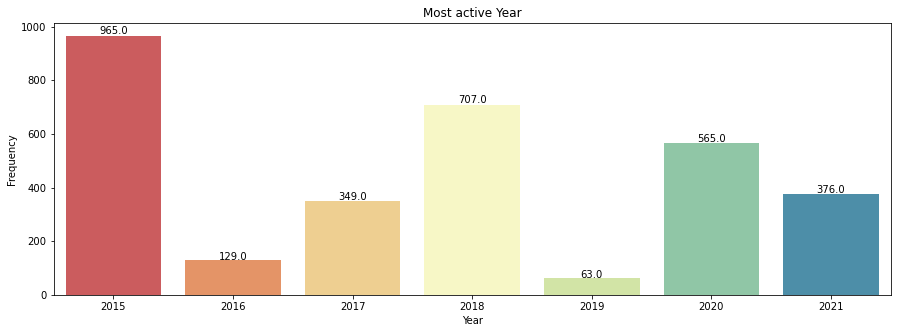

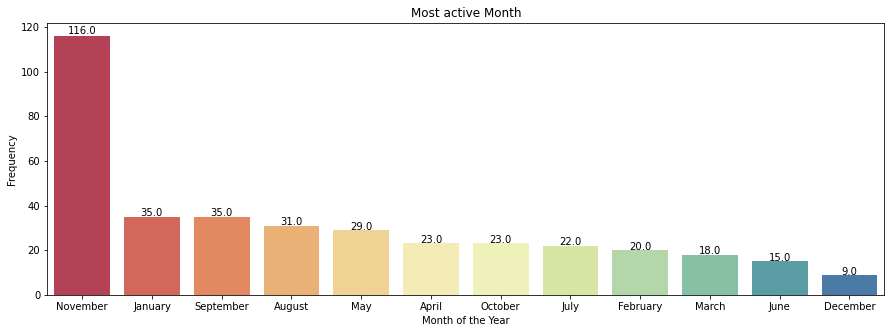

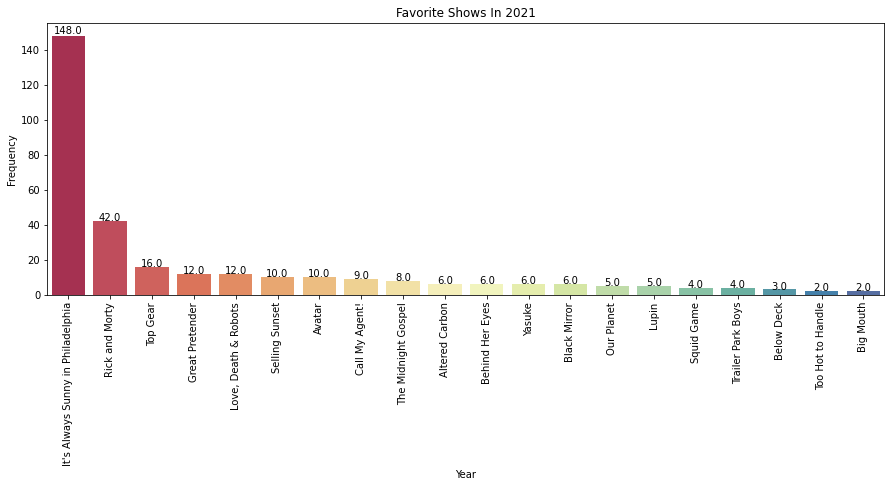

In [12]:
day_frequency_by_year()
day_frequency_by_month()
year_frequency()
month_frequency()
most_watched()
